# Extracting the needed pages 

In [1]:
#importing the library
import PyPDF2

In [2]:
#file object
pdfFile = open('college_cutoffs.pdf', 'rb')

In [3]:
#passing obj to PdfFileReader
pdfReader = PyPDF2.PdfFileReader(pdfFile)

In [4]:
#total number of pages
pdfReader.numPages

1303

In [5]:
#now i will store the number of pages that has civil engineering in it
needed_pages = []

In [6]:
for i in range(0,pdfReader.numPages): #because total number of pages 
    pageObject = pdfReader.getPage(i)
    text = pageObject.extractText()
    temp = text.find('Savitribai')
    if temp != -1:
        temp2 = text.find('Civil')
        if temp2 != -1:
            needed_pages.append(i)
    

In [7]:
#checking the number of pages that contain civil engineering
len(needed_pages)

79

In [8]:
#only 79 pages have Civil engineering data for savitribai college
#our concern is just those pages!
#we need to get a pdf that consists of that pages only
from pathlib import Path

In [9]:
pdf_writer = PyPDF2.PdfFileWriter()
for page in needed_pages:
    pdf_writer.addPage(pdfReader.getPage(page))

In [10]:
pdf_writer.getNumPages()

79

In [11]:
with Path('needed_pages.pdf').open(mode='wb') as file:
    pdf_writer.write(file)

In [12]:
# WE HAVE THE FILE WITH US
# NOW WE NEED TO SCRAPE THE DATA OFF THE FILE

# Scraping the data off the file 

In [13]:
pdfFile = open('needed_pages.pdf', 'rb')
pdfReader = PyPDF2.PdfFileReader(pdfFile)
pdfReader.numPages

79

In [14]:
college_names = []
college_id = []
cutoff_ranks = []

In [15]:
# first we inspect the data

In [16]:
pageObj = pdfReader.getPage(1)
text = pageObj.extractText()

In [17]:
text

'DirState Common Entrance Test Cell\nCut Off List of Maharashtra State Candidature Candidates of \nCAP Round I\n for Admission to First Year of Four Year Full Time Degree Courses in Engineering and Technology for the Academic \nYear \n2019-20Government of Maharashtra5109 - Sandip Foundation, Sandip Institute of Technology and Research Centre, Mahiravani, Nashik\n510919110 - Civil Engineering\nStatus:Home University : Savitribai Phule Pune UniversityHome University Seats Allotted to Home University Candidates\nGOPENHGSTHGNT1HGNT2HGOBCHGSEBCHLOPENHLNT3HLOBCH  I50417(55.6552943)69002(24.7097760)72878(20.8291390)51293(54.1181753\n)59842(38.6358205)56276(45.2441647)48543(58.8609749)  II55540(46.6005953)62089(34.4970054)StageHome University Seats Allotted to Other Than Home University Candidates\nGSCHLOPENHLSCH  I84604(5.2892101)39051(72.7015636)52533(51.8908917)StageOther Than Home University Seats Allotted to Other Than Home University Candidates\nGOPENOGSCOGSTO\nGNT3OGOBCOGSEBCOLSTO\n  I4

In [18]:
# we found a string that is common in all 
common_string = 'DirState Common Entrance Test Cell\nCut Off List of Maharashtra State Candidature Candidates of \nCAP Round I\n for Admission to First Year of Four Year Full Time Degree Courses in Engineering and Technology for the Academic \nYear \n2019-20Government of Maharashtra'

In [19]:
text = text.replace(common_string, '')

In [20]:
text

'5109 - Sandip Foundation, Sandip Institute of Technology and Research Centre, Mahiravani, Nashik\n510919110 - Civil Engineering\nStatus:Home University : Savitribai Phule Pune UniversityHome University Seats Allotted to Home University Candidates\nGOPENHGSTHGNT1HGNT2HGOBCHGSEBCHLOPENHLNT3HLOBCH  I50417(55.6552943)69002(24.7097760)72878(20.8291390)51293(54.1181753\n)59842(38.6358205)56276(45.2441647)48543(58.8609749)  II55540(46.6005953)62089(34.4970054)StageHome University Seats Allotted to Other Than Home University Candidates\nGSCHLOPENHLSCH  I84604(5.2892101)39051(72.7015636)52533(51.8908917)StageOther Than Home University Seats Allotted to Other Than Home University Candidates\nGOPENOGSCOGSTO\nGNT3OGOBCOGSEBCOLSTO\n  I43819(66.1641911\n)61961(34.7316469)51994(52.8287334)83040(7.9836041)48199(59.4349051)64893(30.0428003)48916(58.2196940)StageOther Than Home University Seats Allotted to Home University Candidates\nLOBCO  I77476(15.8364896)StageState LevelTFWS  I30390(82.1686956)Stag

In [21]:
#after removing that common string the remaming text can be used for our purpose
#the first 4 characters will be the college code
temp_string = text[:4]
print(temp_string)
#the next string will have college name
text = text.replace(temp_string, '')
text = text[3:]
temp_string = text.split('\n')[0]
temp_string

5109


'Sandip Foundation, Sandip Institute of Technology and Research Centre, Mahiravani, Nashik'

In [22]:
college_ids = []
for n in range(pdfReader.numPages):
    pageObj = pdfReader.getPage(n)
    pageText = pageObj.extractText()
    pageText = pageText.replace(common_string, '')
    college_ids.append(pageText[:4])

In [23]:
print(len(college_ids))
print(college_ids)

79
['5108', '5109', '5121', '5121', '5124', '5130', '5139', '5151', '5160', '5161', '5162', '5173', '5176', '5177', '5179', '5181', '5184', '5303', '5331', '5380', '5382', '5390', '5399', '5401', '5408', '5411', '5418', '6004', '6006', '6122', '6138', '6141', '6144', '6146', '6149', '6155', '6160', '6160', '6175', '6176', '6177', '6177', '6179', '6182', '6184', '6187', '6203', '6207', '6272', '6272', '6275', '6278', '6284', '6289', '6298', '6307', '6319', '6320', '6324', '6325', '6609', '6620', '6628', '6632', '6634', '6635', '6649', '6732', '6755', '6759', '6768', '6769', '6787', '6794', '6795', '6796', '6802', '6822', '6834']


In [24]:
len(set(college_ids))

75

In [25]:
#4 times the same college had different ranks for civil engineering
#thats a bit of a confusion
#we will have to find a way to go around that

In [26]:
college_names = []
for n in range(pdfReader.numPages):
    pageObj = pdfReader.getPage(n)
    pageText = pageObj.extractText()
    pageText = pageText.replace(common_string,'')
    pageText = pageText[7:]
    pageText = pageText.split('\n')
    college_names.append(pageText[0])

In [27]:
print(len(college_names))
print(college_names)

79
["Nashik District Maratha Vidya Prasarak Samaj's Karmaveer Adv.Babaurao Ganpatrao Thakare College of Engineering, Nashik", 'Sandip Foundation, Sandip Institute of Technology and Research Centre, Mahiravani, Nashik', 'K. K. Wagh Institute of Engineering Education and Research, Nashik', 'K. K. Wagh Institute of Engineering Education and Research, Nashik', "Jagadamba Education Soc. Nashik's S.N.D. College of Engineering & Reserch, Babulgaon512419110 - Civil Engineering", 'Brahma Valley College of Engineering & Research, Trimbakeshwar, Nashik', 'Pravara Rural College of Engineering, Loni, Pravaranagar, Ahmednagar.', "MET Bhujbal Knowledge City MET League's Engineering College, Adgaon, Nashik.", "Sanjivani Rural Education Society's Sanjivani College of Engineering, Kopargaon516019110 - Civil Engineering", 'Dr. Vithalrao Vikhe Patil College of Engineering, Ahmednagar', "Amrutvahini Sheti & Shikshan Vikas Sanstha's Amrutvahini College of Engineering, Sangamner", "SNJB's Late Sau. Kantabai 

In [28]:
#we have extracted the college names 
#the strings contain some other text as well 
#something has to be done for it
#we'll solve this issue as we go along
#this list too will have 4 repeated name in them
print(len(set(college_names)))
print(college_names[0][-1])

75
k


In [29]:
for i in range(len(college_names)):
    college_names[i] = college_names[i].replace('Civil Engineering','')

In [30]:
#checking for the removal of 'Civil Engineering' from the college names
print(college_names)

["Nashik District Maratha Vidya Prasarak Samaj's Karmaveer Adv.Babaurao Ganpatrao Thakare College of Engineering, Nashik", 'Sandip Foundation, Sandip Institute of Technology and Research Centre, Mahiravani, Nashik', 'K. K. Wagh Institute of Engineering Education and Research, Nashik', 'K. K. Wagh Institute of Engineering Education and Research, Nashik', "Jagadamba Education Soc. Nashik's S.N.D. College of Engineering & Reserch, Babulgaon512419110 - ", 'Brahma Valley College of Engineering & Research, Trimbakeshwar, Nashik', 'Pravara Rural College of Engineering, Loni, Pravaranagar, Ahmednagar.', "MET Bhujbal Knowledge City MET League's Engineering College, Adgaon, Nashik.", "Sanjivani Rural Education Society's Sanjivani College of Engineering, Kopargaon516019110 - ", 'Dr. Vithalrao Vikhe Patil College of Engineering, Ahmednagar', "Amrutvahini Sheti & Shikshan Vikas Sanstha's Amrutvahini College of Engineering, Sangamner", "SNJB's Late Sau. Kantabai Bhavarlalji Jain College of Engineeri

In [31]:
#We need to remove the college+branch codes at the end
for i in range(len(college_names)):
    if college_names[i][-1] == ' ':
        name_length = len(college_names[i])
        name_length = name_length - 12
        college_names[i] = college_names[i][:name_length]

In [32]:
#checking for the numbers again
print(college_names)

["Nashik District Maratha Vidya Prasarak Samaj's Karmaveer Adv.Babaurao Ganpatrao Thakare College of Engineering, Nashik", 'Sandip Foundation, Sandip Institute of Technology and Research Centre, Mahiravani, Nashik', 'K. K. Wagh Institute of Engineering Education and Research, Nashik', 'K. K. Wagh Institute of Engineering Education and Research, Nashik', "Jagadamba Education Soc. Nashik's S.N.D. College of Engineering & Reserch, Babulgaon", 'Brahma Valley College of Engineering & Research, Trimbakeshwar, Nashik', 'Pravara Rural College of Engineering, Loni, Pravaranagar, Ahmednagar.', "MET Bhujbal Knowledge City MET League's Engineering College, Adgaon, Nashik.", "Sanjivani Rural Education Society's Sanjivani College of Engineering, Kopargaon", 'Dr. Vithalrao Vikhe Patil College of Engineering, Ahmednagar', "Amrutvahini Sheti & Shikshan Vikas Sanstha's Amrutvahini College of Engineering, Sangamner", "SNJB's Late Sau. Kantabai Bhavarlalji Jain College of Engineering,  (Jain Gurukul), Nem

In [33]:
#We have successfully extracted college names

In [34]:
#anyway now it gets trickier, we need to scrape the numbers off

In [35]:
import pandas as pd
college = pd.DataFrame({'College_ID':college_ids, 'College_Name':college_names})

In [36]:
college.head()

,College_ID,College_Name
0,5108,Nashik District Maratha Vidya Prasarak Samaj's...
1,5109,"Sandip Foundation, Sandip Institute of Technol..."
2,5121,K. K. Wagh Institute of Engineering Education ...
3,5121,K. K. Wagh Institute of Engineering Education ...
4,5124,Jagadamba Education Soc. Nashik's S.N.D. Colle...


In [37]:
#The number scraping part was becoming more and more complex; the formatting of each page wasn't uniform.
#So opted for converting the
#

In [38]:
raw_xl = pd.ExcelFile("needed_pages.xlsx")

In [39]:
table_names = []
for i in range(1,80):
    string = 'Table '
    string = string + str(i)
    table_names.append(string)

In [40]:
table_names

['Table 1',
 'Table 2',
 'Table 3',
 'Table 4',
 'Table 5',
 'Table 6',
 'Table 7',
 'Table 8',
 'Table 9',
 'Table 10',
 'Table 11',
 'Table 12',
 'Table 13',
 'Table 14',
 'Table 15',
 'Table 16',
 'Table 17',
 'Table 18',
 'Table 19',
 'Table 20',
 'Table 21',
 'Table 22',
 'Table 23',
 'Table 24',
 'Table 25',
 'Table 26',
 'Table 27',
 'Table 28',
 'Table 29',
 'Table 30',
 'Table 31',
 'Table 32',
 'Table 33',
 'Table 34',
 'Table 35',
 'Table 36',
 'Table 37',
 'Table 38',
 'Table 39',
 'Table 40',
 'Table 41',
 'Table 42',
 'Table 43',
 'Table 44',
 'Table 45',
 'Table 46',
 'Table 47',
 'Table 48',
 'Table 49',
 'Table 50',
 'Table 51',
 'Table 52',
 'Table 53',
 'Table 54',
 'Table 55',
 'Table 56',
 'Table 57',
 'Table 58',
 'Table 59',
 'Table 60',
 'Table 61',
 'Table 62',
 'Table 63',
 'Table 64',
 'Table 65',
 'Table 66',
 'Table 67',
 'Table 68',
 'Table 69',
 'Table 70',
 'Table 71',
 'Table 72',
 'Table 73',
 'Table 74',
 'Table 75',
 'Table 76',
 'Table 77',
 'Table 

In [41]:
number_strings = []
for i in range(79):
    sheet = pd.read_excel(raw_xl, table_names[i])
    for j in range(2):
        if sheet.iloc[j,0] == 'I':
            number_strings.append(sheet.iloc[j,1])
            break

In [42]:
#now we have extracted the cutoff ranks 
#we need to process them and convert it into required format

In [43]:
number_strings[0]

'38617\n(73.1965557)'

In [44]:
temp = number_strings[0].split('\n')[0]
int(temp)

38617

In [45]:
converted_numbers = []
for i in number_strings:
    temp = i.split('\n')[0]
    temp = int(temp)
    converted_numbers.append(temp)

In [46]:
print(len(converted_numbers),converted_numbers)

79 [38617, 50417, 22937, 32662, 53420, 62679, 37793, 39672, 37829, 36668, 34835, 51433, 84289, 80859, 59772, 52670, 32066, 76658, 86676, 65050, 46250, 72194, 43272, 75253, 76835, 86342, 64014, 12456, 1255, 86350, 86522, 32932, 39934, 16173, 77715, 48052, 54833, 85727, 12971, 86331, 32805, 50805, 75089, 85995, 83189, 86733, 69340, 45456, 40070, 48387, 70739, 28635, 51428, 14178, 77452, 70199, 87078, 80753, 78636, 23543, 86104, 80689, 77441, 85375, 86552, 53775, 86534, 58410, 86681, 68434, 83588, 86401, 82394, 84687, 81692, 59535, 46359, 41752, 84073]


In [47]:
#the ranks are for general open category home state students 
college['CutOff_Ranks'] = converted_numbers

In [48]:
college.head()

,College_ID,College_Name,CutOff_Ranks
0,5108,Nashik District Maratha Vidya Prasarak Samaj's...,38617
1,5109,"Sandip Foundation, Sandip Institute of Technol...",50417
2,5121,K. K. Wagh Institute of Engineering Education ...,22937
3,5121,K. K. Wagh Institute of Engineering Education ...,32662
4,5124,Jagadamba Education Soc. Nashik's S.N.D. Colle...,53420


In [49]:
#Remember we had repeating colleges with different cutoff ranks

In [50]:
#Inquiry has started about that issue, will update as soon as I come to know!

In [51]:
college['College_ID'].value_counts()

5121    2
6177    2
6160    2
6272    2
6319    1
       ..
6275    1
6732    1
6796    1
6307    1
5380    1
Name: College_ID, Length: 75, dtype: int64

In [52]:
college.sort_values('CutOff_Ranks').head(10)

,College_ID,College_Name,CutOff_Ranks
28,6006,"College of Engineering, Pune",1255
27,6004,"Government College of Engineering & Research, ...",12456
38,6175,"Pimpri Chinchwad Education Trust, Pimpri Chinc...",12971
53,6289,B.R.A.C.T's Vishwakarma Institute of Informati...,14178
33,6146,"MIT Academy of Engineering,Alandi, Pune",16173
2,5121,K. K. Wagh Institute of Engineering Education ...,22937
59,6325,Alard Charitable Trust's Alard College of Eng...,23543
51,6278,All India Shri Shivaji Memorial Society's Coll...,28635
16,5184,Amruta Vaishnavi Education & Welfare Trust's S...,32066
3,5121,K. K. Wagh Institute of Engineering Education ...,32662


#### Using the mean of the two ranks for the same college 

In [53]:
#taking mean of the cutoff ranks for the duplicate colleges for now
import numpy as np
new_college = pd.pivot_table(college, index='College_ID', values='CutOff_Ranks', aggfunc=np.mean)
new_college = new_college.sort_values('CutOff_Ranks').head(10)

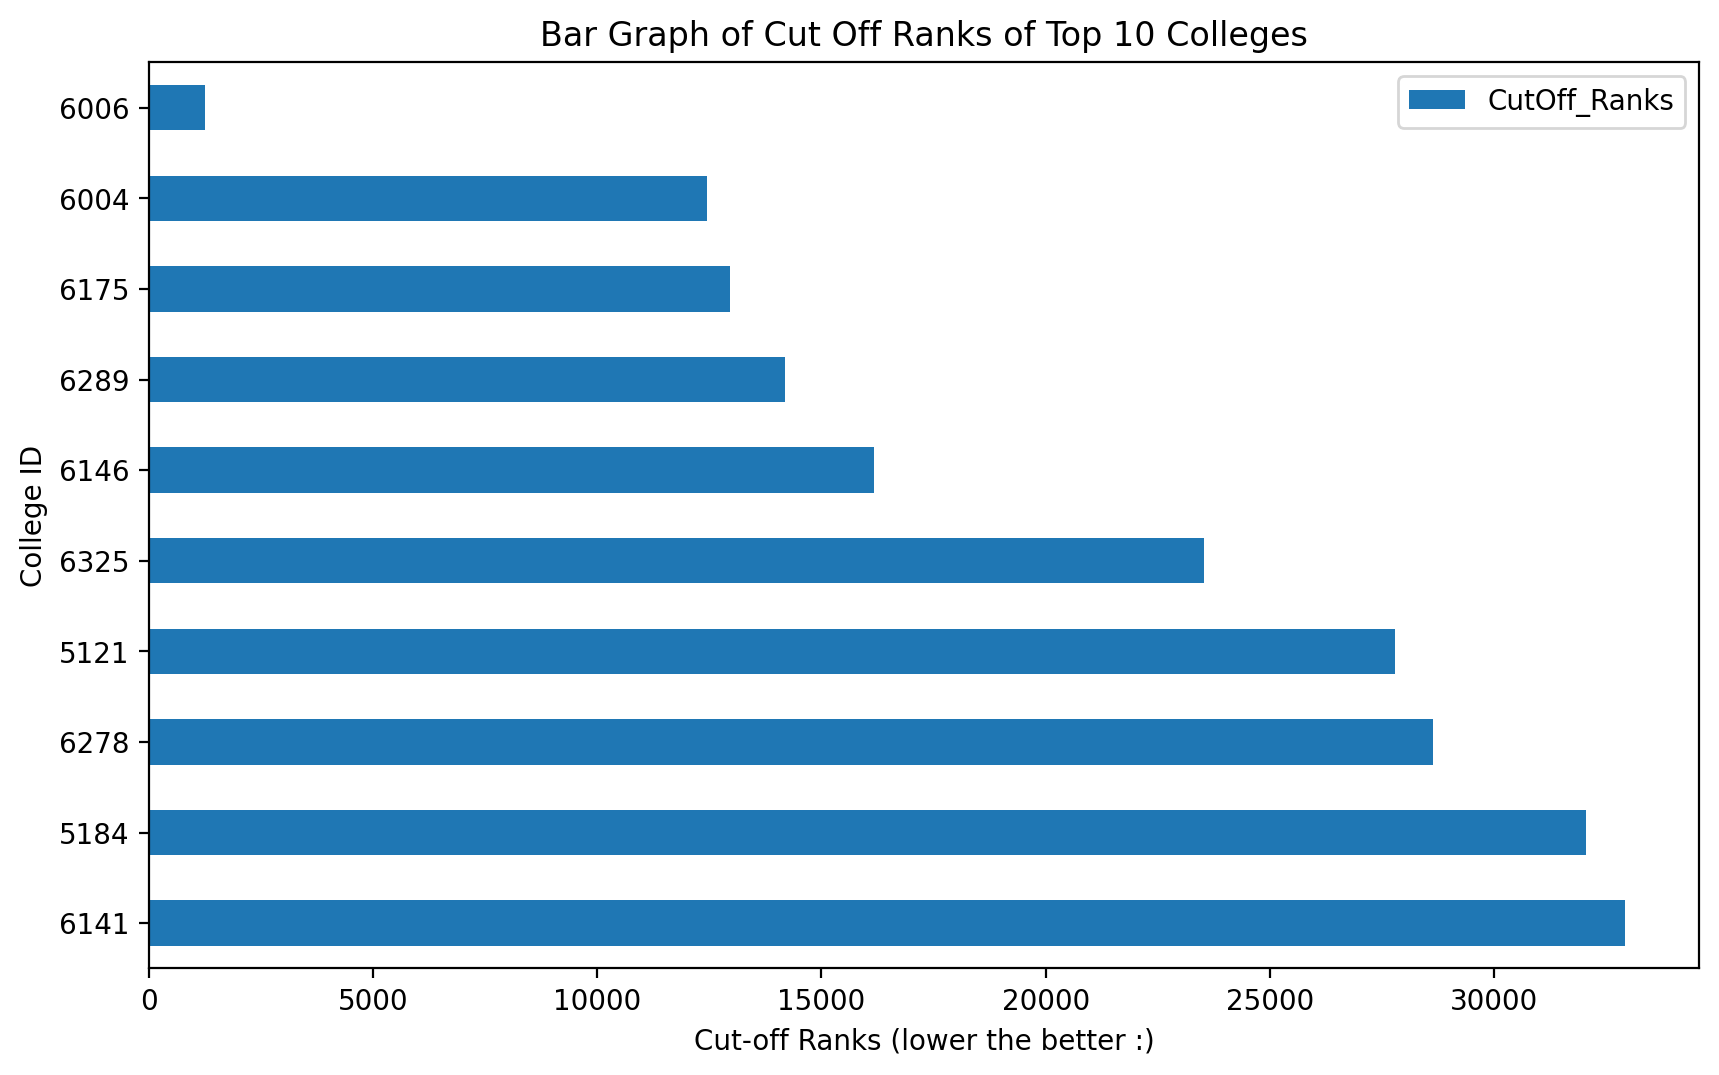

Names of top 10 colleges for Civil Engineering whose home university is Savitribai Phule University : 

1. College of Engineering, Pune - 6006
2. Government College of Engineering & Research, Avasari Khurd - 6004
3. Pimpri Chinchwad Education Trust, Pimpri Chinchwad College of Engineering, Pune - 6175
4. B.R.A.C.T's Vishwakarma Institute of Information Technology, Kondhwa (Bk.), Pune - 6289
5. MIT Academy of Engineering,Alandi, Pune - 6146
6. Alard  Charitable Trust's Alard College of Engineering and Management, Pune - 6325
7. K. K. Wagh Institute of Engineering Education and Research, Nashik - 5121
8. All India Shri Shivaji Memorial Society's College of Engineering, Pune - 6278
9. Amruta Vaishnavi Education & Welfare Trust's Shatabdi Institute of Engineering & Research, Agaskhind Tal. Sinnar - 5184
10. Jaywant Shikshan Prasarak Mandal's,Rajarshi Shahu College of Engineering, Tathawade, Pune - 6141


In [54]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,6), dpi=200)
ax = new_college.sort_values('CutOff_Ranks', ascending=False).plot(kind='barh', ax=ax)
#ax = new_college.plot(kind='barh', ax=ax)
plt.xlabel('Cut-off Ranks (lower the better :)')
plt.ylabel('College ID')
plt.title('Bar Graph of Cut Off Ranks of Top 10 Colleges')
plt.show()

# name of the top 10 colleges
tempList = new_college.index.values
tempListoNames = []
for i in tempList:
    tempListoNames.append(college[college['College_ID']==i]['College_Name'].values[0])
    
print("Names of top 10 colleges for Civil Engineering whose home university is Savitribai Phule University : ",end='\n\n')
for i,k in enumerate(tempListoNames):
    print("{}. ".format(i+1), end='')
    print(k, end=' - ')
    print(tempList[i])

In [55]:
#saving the dataframe to a csv
college.to_csv('college_Open.csv')

#### Using the minimum of the two ranks for the same college!

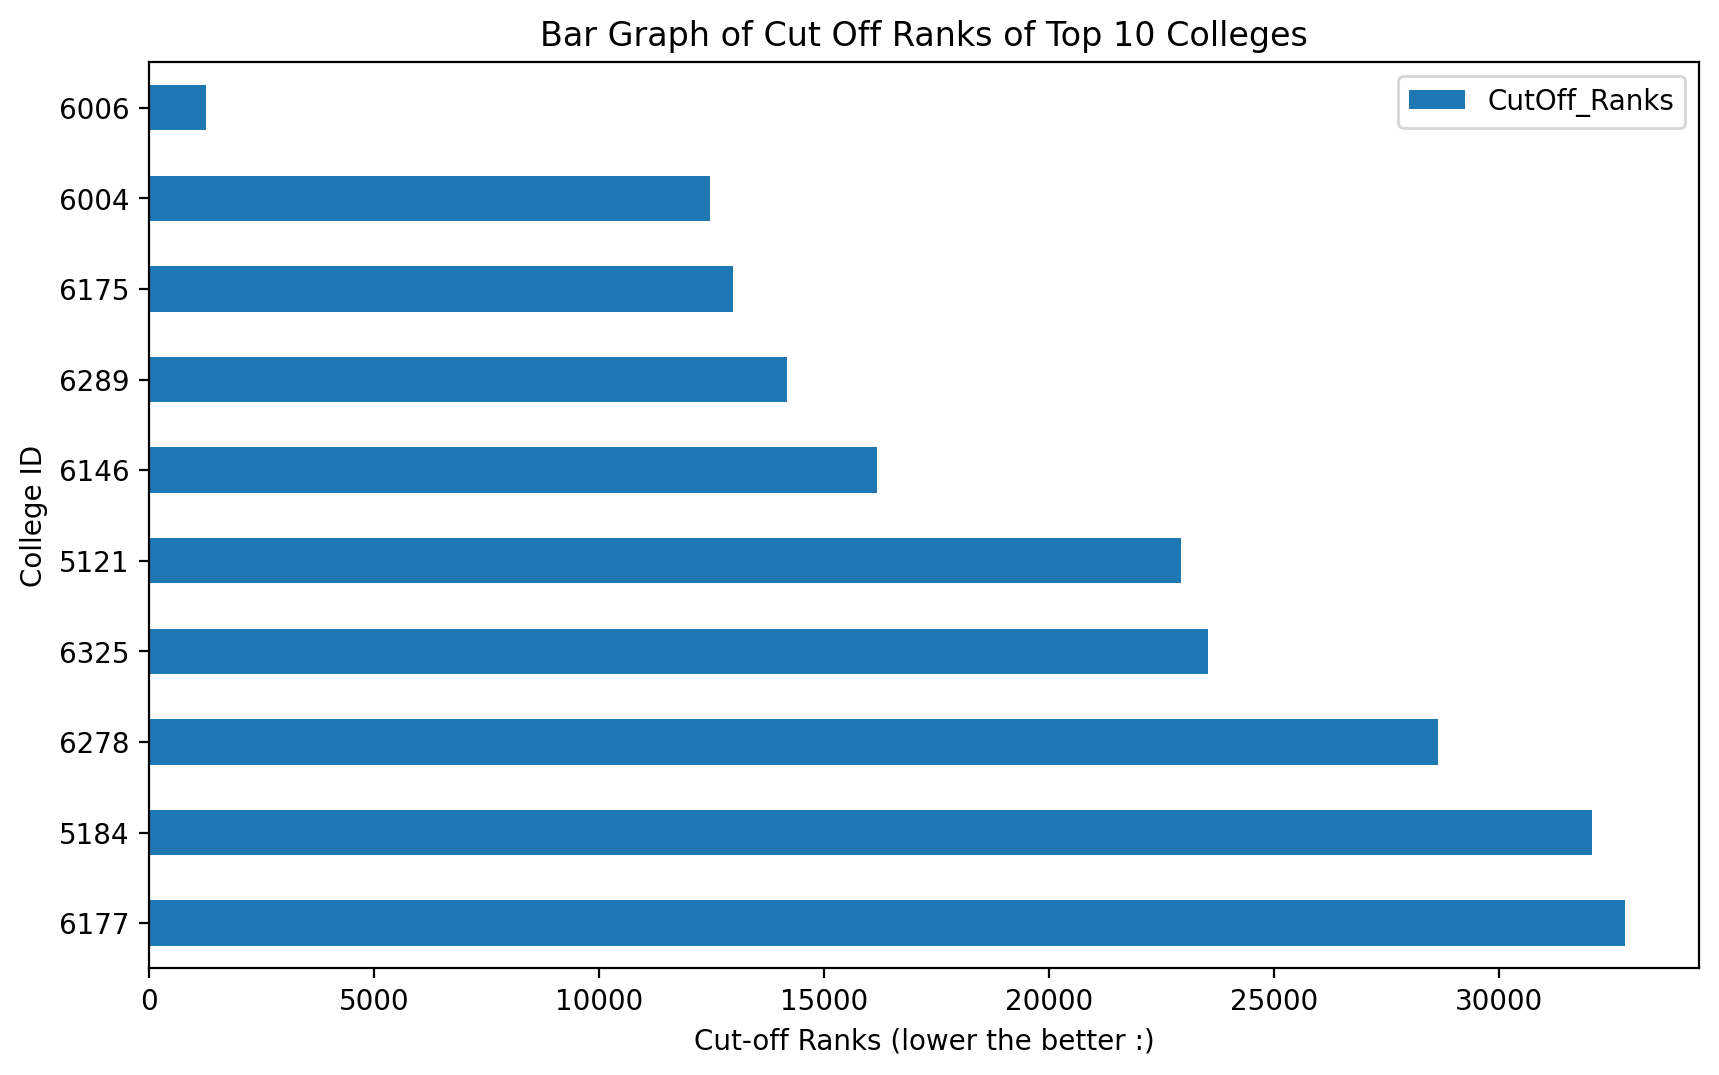

Names of top 10 colleges for Civil Engineering whose home university is Savitribai Phule University : 

1. College of Engineering, Pune - 6006
2. Government College of Engineering & Research, Avasari Khurd - 6004
3. Pimpri Chinchwad Education Trust, Pimpri Chinchwad College of Engineering, Pune - 6175
4. B.R.A.C.T's Vishwakarma Institute of Information Technology, Kondhwa (Bk.), Pune - 6289
5. MIT Academy of Engineering,Alandi, Pune - 6146
6. K. K. Wagh Institute of Engineering Education and Research, Nashik - 5121
7. Alard  Charitable Trust's Alard College of Engineering and Management, Pune - 6325
8. All India Shri Shivaji Memorial Society's College of Engineering, Pune - 6278
9. Amruta Vaishnavi Education & Welfare Trust's Shatabdi Institute of Engineering & Research, Agaskhind Tal. Sinnar - 5184
10. Sinhgad College of Engineering, Vadgaon (BK), Pune - 6177


In [56]:
new_college = pd.pivot_table(college, index='College_ID', values='CutOff_Ranks', aggfunc=min)
new_college = new_college.sort_values('CutOff_Ranks').head(10)

import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10,6), dpi=200)
ax = new_college.sort_values('CutOff_Ranks', ascending=False).plot(kind='barh', ax=ax)
#ax = new_college.plot(kind='barh', ax=ax)
plt.xlabel('Cut-off Ranks (lower the better :)')
plt.ylabel('College ID')
plt.title('Bar Graph of Cut Off Ranks of Top 10 Colleges')
plt.show()

# name of the top 10 colleges
tempList = new_college.index.values
tempListoNames = []
for i in tempList:
    tempListoNames.append(college[college['College_ID']==i]['College_Name'].values[0])
    
print("Names of top 10 colleges for Civil Engineering whose home university is Savitribai Phule University : ",end='\n\n')
for i,k in enumerate(tempListoNames):
    print("{}. ".format(i+1), end='')
    print(k, end=' - ')
    print(tempList[i])

## The main task is done!

## Check the next Jupyter Notebook for a wider analysis!

## Link : https://github.com/vishxm/DataScienceNBs/blob/master/CapGuideTask/civilTop10New.ipynb  